<a href="https://colab.research.google.com/github/Juhi-Purswani/Tensorflow_Multiclass_Image_Classification/blob/master/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive') 


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
import os
os.chdir("./drive/My Drive/Plant_Seedlings")

In [0]:
pip install tensornets

     |████████████████████████████████| 593kB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/0c/ae/7a/6d31e83c89c2b02c13e8f08ee8e20abe71670061e057a6058f
Successfully built tensornets


In [0]:
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensornets as nets

Using TensorFlow backend.


In [0]:
IMG_SIZE = 224
CHANNELS = 3
TRAIN_DIR = 'plant_seedlings'
#TEST_DIR = ''
batch_size = 32
learning_rate = 0.001
training_iters = 20
n_classes = 12

In [0]:
def create_features_labels(DIR):
  features = []
  labels = []
  dir_number = 0
  car_names = os.listdir(DIR)
  for name in car_names:
    path = DIR + '/' + name
    print("dir name and number" , path , 'and',dir_number)
    print(path)
    image_names = os.listdir(path)
    i=0
    for image_name in image_names:
      i=i+1
      if(i>120):
        continue
      image_path = path + '/' + image_name
      img = cv2.imread(image_path,cv2.IMREAD_COLOR)
      img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      features.append(img)
      labels.append(np.array(dir_number))
    dir_number = dir_number + 1
  return(features , labels)

In [0]:
train_features,train_labels = create_features_labels(TRAIN_DIR)

dir name and number plant_seedlings/Scentless Mayweed and 0
plant_seedlings/Scentless Mayweed
dir name and number plant_seedlings/Loose Silky-bent and 1
plant_seedlings/Loose Silky-bent
dir name and number plant_seedlings/Common wheat and 2
plant_seedlings/Common wheat
dir name and number plant_seedlings/Charlock and 3
plant_seedlings/Charlock
dir name and number plant_seedlings/Sugar beet and 4
plant_seedlings/Sugar beet
dir name and number plant_seedlings/Small-flowered Cranesbill and 5
plant_seedlings/Small-flowered Cranesbill
dir name and number plant_seedlings/Cleavers and 6
plant_seedlings/Cleavers
dir name and number plant_seedlings/Fat Hen and 7
plant_seedlings/Fat Hen
dir name and number plant_seedlings/Common Chickweed and 8
plant_seedlings/Common Chickweed
dir name and number plant_seedlings/Shepherd’s Purse and 9
plant_seedlings/Shepherd’s Purse
dir name and number plant_seedlings/Maize and 10
plant_seedlings/Maize
dir name and number plant_seedlings/Black-grass and 11
plan

In [0]:
features, labels = shuffle(train_features,train_labels)
features = np.asarray(features).reshape(-1,IMG_SIZE,IMG_SIZE,CHANNELS)
labels = np.asarray(labels)
#test_labels = np.asarray(test_labels)
labels = to_categorical(labels)
#test_labels = to_categorical(test_labels)

print(features.shape,labels.shape)

(1440, 224, 224, 3) (1440, 12)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train = (X_train/np.float32(255))
X_test = X_test/np.float32(255)


In [0]:
X_train.shape

(1152, 224, 224, 3)

In [0]:


# ImageNet input image shape is (244, 244, 3)
inputs = tf.placeholder(tf.float32, [None, IMG_SIZE,IMG_SIZE,CHANNELS])

# Output is dependent on your situation (10 for CIFAR-10)
outputs = tf.placeholder(tf.float32, [None, n_classes])

# VGG19 returns the last layer (softmax)
# model to give the name
logits = nets.ResNet50(inputs, is_training=True, classes=n_classes)
model = tf.identity(logits, name='logits')

# loss function applied to the last layer
# train on the loss (Adam Optimizer is used)
loss = tf.losses.softmax_cross_entropy(outputs, logits)
train = tf.train.AdamOptimizer(learning_rate=1e-5).minimize(loss)

# for measuring accuracy after forward passing
correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(outputs, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

W0707 13:01:49.116525 140009738106752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensornets/utils.py:238: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0707 13:01:49.133281 140009738106752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensornets/utils.py:277: The name tf.get_variable_scope is deprecated. Please use tf.compat.v1.get_variable_scope instead.

W0707 13:01:53.007740 140009738106752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensornets/utils.py:246: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 13:01:53.009194 140009738106752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensornets/utils.py:125: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W0707 13:01:53.082142 140009738106752 deprecation.py:323] From /usr/local/lib/pyth

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(logits.pretrained())
    training_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    #print("aaa")
    #summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    for i in range(training_iters):
        for batch in range(len(X_train)//batch_size):
            #print("bbb")
            batch_x = X_train[batch*batch_size:min((batch+1)*batch_size,len(X_train))]
            batch_y = y_train[batch*batch_size:min((batch+1)*batch_size,len(y_train))]
            #print("A")
            #print(batch_x.shape,batch_y.shape)
            
            opt = sess.run(train, feed_dict={inputs: batch_x,outputs: batch_y})
            #print("B")
            train_loss, acc = sess.run([loss, accuracy], feed_dict={inputs: batch_x, outputs: batch_y})
            #print("C")
        #print("D")
        loss2, val_acc = sess.run([loss, accuracy], feed_dict={inputs: X_test, outputs: y_test})
        #print("E")
        print("Epoch", i+1 , ": training loss:" , train_loss, ", training accuracy:", acc,", valiation loss:" , loss2, ", validation accuracy:", val_acc)
        #print("the ", i , "th iteration with valiation loss: " , loss2, " and validation accuracy: ", val_acc)
        #print("_____________________________________________________________")
        #print(loss)
        #print("_____________________________________________________________")
        training_loss.append(train_loss)
        train_accuracy.append(acc)
        val_loss.append(loss2)
        val_accuracy.append(val_acc)
    #summary_writer.close()

102899712/102891672 [==============================] - 2s 0us/step


W0707 13:02:01.351774 140009738106752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tensornets/utils.py:130: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.



Epoch 1 : training loss: 2.3771675 , training accuracy: 0.375 , valiation loss: 2.4012866 , validation accuracy: 0.2847222
Epoch 2 : training loss: 2.1565852 , training accuracy: 0.625 , valiation loss: 2.2785463 , validation accuracy: 0.44444445
Epoch 3 : training loss: 2.0158346 , training accuracy: 0.6875 , valiation loss: 2.192407 , validation accuracy: 0.5
Epoch 4 : training loss: 1.9148033 , training accuracy: 0.8125 , valiation loss: 2.1298337 , validation accuracy: 0.6006944
Epoch 5 : training loss: 1.8252878 , training accuracy: 0.9375 , valiation loss: 2.0585835 , validation accuracy: 0.6770833
Epoch 6 : training loss: 1.747273 , training accuracy: 0.9375 , valiation loss: 1.9983205 , validation accuracy: 0.7395833
Epoch 7 : training loss: 1.7065831 , training accuracy: 0.9375 , valiation loss: 1.9588724 , validation accuracy: 0.7708333
Epoch 8 : training loss: 1.6850818 , training accuracy: 0.96875 , valiation loss: 1.9318537 , validation accuracy: 0.78125
Epoch 9 : training

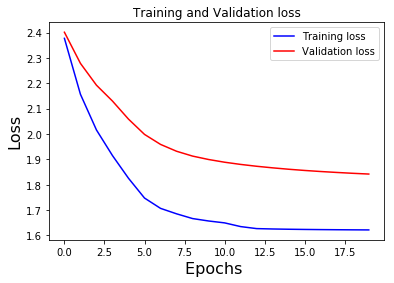

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(training_loss)), training_loss, 'b', label='Training loss')
plt.plot(range(len(val_loss)), val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

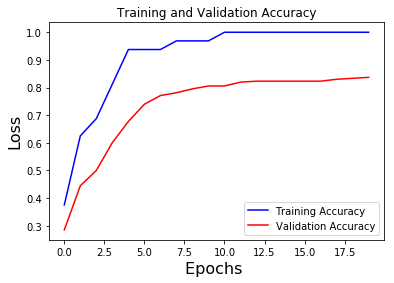

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(len(training_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(val_loss)), val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 